# Autoregressive Model - AR(p)

It is used to describe certain time-varying processes in nature, economics, etc. The autoregressive model specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term); thus the model is in the form of a stochastic difference equation.**This tutorial shows an AR(p) model and its parameter optimization using Yule-Walker estimators.**

An $AR(p)$ model

$X_t = \sum^{p}_{i = 1}\Phi_i X_{t-i}$

assuming the mean is zero and the process is stationary.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.ndimage.interpolation import shift
from sklearn.model_selection import train_test_split

In [2]:
p = 3 # amount of past dependency

In [3]:
def prepare(x,p):
    return np.asarray([shift(x,i,cval=np.nan) for i in range(p)]).T

def f(x):
    return np.dot(x,phi).ravel()

def autocorr(x,lag=30):
    c = np.correlate(x, x, 'full')
    mid = len(c)//2
    acov = c[mid:mid+lag]
    acor = acov/acov[0]
    return(acor)

In [4]:
# data generation
x = np.linspace(0,4*np.pi,100)
y = np.sin(x)*5 + np.random.randn(100)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,shuffle=False)

In [5]:
mu = np.mean(y_train)
y_train = y_train - mu

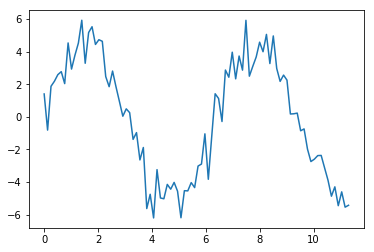

In [6]:
# first look
plt.plot(x_train,y_train)

In [7]:
# get autocovariances
ac = autocorr(y_train,p+1)

# initialize a matrix by one shift at each row with given data
X1 = linalg.toeplitz(ac[:p])

#
X2 = ac[1:p+1]
phi = linalg.inv(X1).dot(X2).reshape((p,1))
print(phi)

[[ 0.59243366]
 [ 0.38720253]
 [-0.04259724]]


In [8]:
# prepare data to use in model - just adding new columns by shifting one
X = prepare(y_train,p)

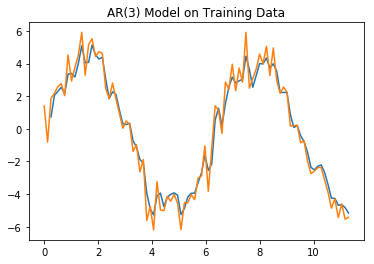

In [9]:
plt.plot(x_train,f(X))
plt.plot(x_train,y_train)
plt.title('AR({}) Model on Training Data'.format(p))
plt.show()

In [10]:
X = prepare(y_test,p)

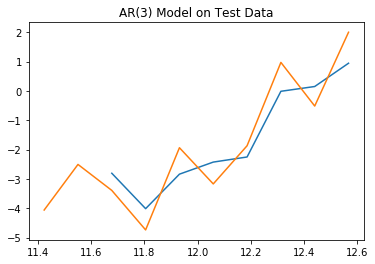

In [11]:
# out of sample predictions
plt.plot(x_test,f(X))
plt.plot(x_test,y_test)
plt.title('AR({}) Model on Test Data'.format(p))
plt.show()